In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore',DeprecationWarning)
%matplotlib inline

df = pd.read_csv('~/Downloads/OnlineNewsPopularity/OnlineNewsPopularity.csv')
df.columns = df.columns.str.replace(' ', '')


df = df.rename(columns={'weekday_is_monday': 'monday', 'weekday_is_tuesday': 'tuesday', 'weekday_is_wednesday': 'wednesday', 'weekday_is_thursday': 'thursday', 'weekday_is_friday': 'friday', 'weekday_is_saturday': 'saturday', 'weekday_is_sunday': 'sunday', 'is_weekend': 'weekend'})
df = df.rename(columns={'data_channel_is_lifestyle':'lifestyle', 'data_channel_is_entertainment':'entertainment', 'data_channel_is_bus':'business', 'data_channel_is_socmed':'social_media', 'data_channel_is_tech':'technology', 'data_channel_is_world':'world'})
df.head()


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


### Data Visualization and Attribute Relationships

The following section shows bar charts and cross tabulations of the relationships between the different attributes and the shares for each day of the week. To start with the visualization, the following data points were added to help with representing the data.

In [56]:
#create a function to consolidate all the weekday_is_[monday....sunday] columns to one single colum "weekday"
def label_weekday (row):
   if row['monday'] == 1 :
      return 'Monday'
   if row['tuesday'] == 1 :
      return 'Tuesday'
   if row['wednesday'] == 1 :
      return 'Wednesday'
   if row['thursday'] == 1 :
      return 'Thursday'  
   if row['friday'] == 1 :
      return 'Friday'
   if row['saturday'] == 1 :
      return 'Saturday'  
   if row['sunday'] == 1 :
      return 'Sunday'
   return 'Other'

Created a new function to help with consolidating the weekday columns into one categorical variable/column

In [57]:
df['weekday'] = df.apply (lambda row: label_weekday (row),axis=1)

In [58]:
df[['weekday']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 1 columns):
weekday    39644 non-null object
dtypes: object(1)
memory usage: 309.8+ KB


Review the newly created column, to verify the data type

In [59]:
df.weekday.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

Reviewed the unique data values in the column weekday

In [147]:
df['popularity'] = pd.qcut(df['shares'].values, 3, labels=["Low","Medium","High"])

In [107]:
df.popularity.unique()

[Low, Medium, High]
Categories (3, object): [Low < Medium < High]

Created a new column called "popularity", by spliting the shares data point into either Low, Medium or High by spliting them into equal-sized buckets based on rank or based on sample quantiles

In [139]:
df_popularity = pd.crosstab([df['popularity']], df.shares.count())
df_week = pd.crosstab([df['weekday']], df.shares.count())


In [140]:
print (df_popularity)


col_0       39644
popularity       
Low         14732
Medium      11957
High        12955


In [141]:
print (df_week)

col_0      39644
weekday         
Friday      5701
Monday      6661
Saturday    2453
Sunday      2737
Thursday    7267
Tuesday     7390
Wednesday   7435


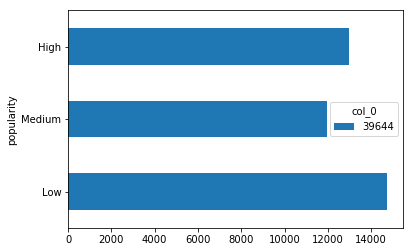

In [142]:
df_popularity.plot(kind='barh')

In this plot we split the column shares into equal-sized buckets based on rank or based on sample quantiles and labelled them as low, medium, high.
[Low < Medium < High]

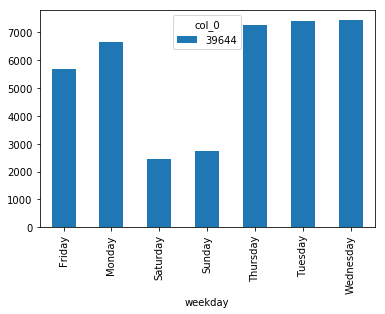

In [145]:
df_week.plot(kind='bar')

Bar graph shows when the article was published (day of the week) and the number of times the article was shared, from the graph we can see that the articles that was shared the most was published on Tuesday, Wednesday or Thursday.


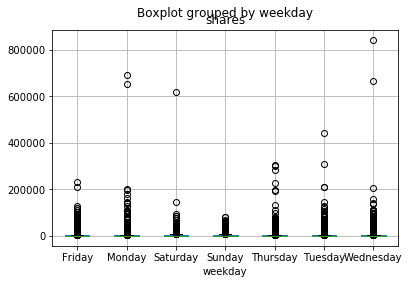

In [137]:
df.boxplot(column='shares', by='weekday')

The boxplot was created to understand how articles were shared depending on which day of the week it was published. As we can see that one articles published on wednesday got the most shares, however its not consistant